In [1]:
# import packages
import numpy as np
import pylab as py
import pdb
import matplotlib.pyplot as plt
import math

# import spisea packages
from spisea import synthetic, evolution, atmospheres, reddening, ifmr
from spisea.imf import imf, multiplicity

# import nbody6tools reader to read data
from nbody6tools import Reader

# import nbody62spisea to retrieve star ages
from nbody62spisea import converter

/home/wyz5rge/.local/lib/python3.9/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /scratch/wyz5rge/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


## Set up parameters, create isochrone grid

In [2]:
# define isochrone parameters
AKs = 0
dist = 410
evo_model = evolution.Baraffe15()
atm_func = atmospheres.get_merged_atmosphere
red_law = reddening.RedLawHosek18b()
filt_list = ['jwst,F115W', 'jwst,F182M']
filters = ['m_jwst_F115W', 'm_jwst_F182M']
iso_dir = 'isochrones/'
metallicity = 0

In [3]:
# read nbody data
path_to_data = '../../../../../../storage/jfarias/Data/Orion/massive_clusters/M3000new/sigma0p1/fiducial/sfe_ff001/00/'
snapshot = Reader.read_snapshot(path_to_data, time = 20)

# convert snapshot values from nbody units to astrophysical, extract masses
snapshot.to_physical()

# read ages for simulated stars
cluster_table = converter.to_spicea_table(snapshot)

print(cluster_table)

        mass        isMultiple        compMass             systemMass              e                 log_a               age        
------------------- ---------- ---------------------- ------------------- -------------------- ------------------ ------------------
0.06895842179945424        0.0                     [] 0.06895842179945424                  nan                nan  18.62630555946738
0.08626887187757219        0.0                     [] 0.08626887187757219                  nan                nan  3.069082513027311
  2.326448478984193        0.0                     []   2.326448478984193                  nan                nan  18.33038253724003
0.04093112166717806        0.0                     [] 0.04093112166717806                  nan                nan  3.069082513027311
                ...        ...                    ...                 ...                  ...                ...                ...
0.03156546631062232        1.0 [0.017415375068988628] 0.0489808413796

In [4]:
masses = cluster_table['mass']
level_ages = cluster_table['age']

for i in range(len(level_ages)):
    level_ages[i] = level_ages[i] * 1e6

# convert log ages from log(Myr) to log(yr)
log_ages = np.log10(level_ages)

# print(log_ages)
print("Min log age = " + str(min(log_ages)))
print("Max log age = " + str(max(log_ages)))

# print(level_ages)
print("Min level age = " + str(min(level_ages)))
print("Max level age = " + str(max(level_ages)))

Min log age = 6.407048843194058
Max log age = 7.3018036073193215
Min level age = 2552988.4099163027
Max level age = 20035657.88269043


In [5]:
# find index of first binary, create array of companion masses
first_binary = 0
for i in range(len(cluster_table)):
    if cluster_table['isMultiple'][i] == 1.0:
        first_binary = i
        break
print(first_binary)

compMasses = []
for i in range(len(cluster_table)):
    if cluster_table['isMultiple'][i] == 1.0:
        compMasses.append(cluster_table['compMass'][i][0])
print(compMasses)

1745
[0.018772196398952473, 0.020398101994065967, 0.04970394506596586, 0.011418578712969283, 0.1109845537581072, 0.08288741359987532, 0.054993759410529613, 0.33087717935666183, 0.17271523389867505, 0.013492928385704234, 0.06711686707284298, 0.10798400551211244, 0.029492553417922056, 0.14367710080576154, 0.26903433005844346, 0.08474773851417283, 0.30095260930078693, 0.05497012322155322, 0.09173333630199015, 0.025891768717209534, 0.02735674785778421, 0.1558841429805367, 0.048604116260690874, 0.04128694062892624, 0.03487493039755069, 0.14196306235013237, 0.04280274224495466, 0.02310867140421406, 0.3955789882313527, 0.15676043958471955, 0.08859345991063905, 0.055069286248966655, 0.1552959762503858, 0.09515570587436127, 0.04718531929120123, 0.03205825521948448, 0.011501610127550384, 1.1694443225860596, 0.0922981857375905, 0.11274085938930511, 0.16108334558162823, 0.07456852106262159, 0.013275199569761753, 0.11918815425644891, 0.038134801276114384, 0.019446755405924193, 0.10889488258261569, 

In [6]:
start = (min(level_ages) // 0.5e6) * 0.5e6
end = (max(level_ages) // 0.5e6) * 0.5e6 + 2 * 0.5e6
increment = 0.5e6  # 500,000

# Create age arrays
level_age_arr = np.arange(start, end, increment)
log_age_arr = np.log10(level_age_arr)

print(log_age_arr)
print(level_age_arr)

[6.39794001 6.47712125 6.54406804 6.60205999 6.65321251 6.69897
 6.74036269 6.77815125 6.81291336 6.84509804 6.87506126 6.90308999
 6.92941893 6.95424251 6.97772361 7.         7.0211893  7.04139269
 7.06069784 7.07918125 7.09691001 7.11394335 7.13033377 7.14612804
 7.161368   7.17609126 7.1903317  7.20411998 7.21748394 7.23044892
 7.24303805 7.25527251 7.26717173 7.2787536  7.29003461 7.30103
 7.31175386]
[ 2500000.  3000000.  3500000.  4000000.  4500000.  5000000.  5500000.
  6000000.  6500000.  7000000.  7500000.  8000000.  8500000.  9000000.
  9500000. 10000000. 10500000. 11000000. 11500000. 12000000. 12500000.
 13000000. 13500000. 14000000. 14500000. 15000000. 15500000. 16000000.
 16500000. 17000000. 17500000. 18000000. 18500000. 19000000. 19500000.
 20000000. 20500000.]


In [7]:
# create isochrone grid - if this is the first time, then this is going to take an hour lmfao
instances = np.empty(len(log_age_arr), dtype=object)

for i in range(len(log_age_arr)):
    my_iso = synthetic.IsochronePhot(log_age_arr[i], AKs, dist, metallicity=metallicity,
                            evo_model=evo_model, atm_func=atm_func,
                            red_law=red_law, filters=filt_list,
                                iso_dir=iso_dir)
    instances[i] = my_iso
        
print("isochrone generation done")

Isochrone generation took 1.131738 s.
Making photometry for isochrone: log(t) = 6.40  AKs = 0.00  dist = 410
     Starting at:  2023-12-19 04:08:48.583305   Usually takes ~5 minutes
Starting filter: jwst,F115W   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.070 Msun  T =  2904 K  m_jwst_F115W = 14.69
Starting filter: jwst,F182M   Elapsed time: 0.44 seconds
Starting synthetic photometry
M =   0.070 Msun  T =  2904 K  m_jwst_F182M = 13.95
      Time taken: 0.88 seconds
Isochrone generation took 0.931034 s.
Making photometry for isochrone: log(t) = 6.48  AKs = 0.00  dist = 410
     Starting at:  2023-12-19 04:08:50.414208   Usually takes ~5 minutes
Starting filter: jwst,F115W   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.070 Msun  T =  2906 K  m_jwst_F115W = 14.78
Starting filter: jwst,F182M   Elapsed time: 0.44 seconds
Starting synthetic photometry
M =   0.070 Msun  T =  2906 K  m_jwst_F182M = 14.04
      Time taken: 0.87 seconds
Isochrone generati

      Time taken: 0.88 seconds
Isochrone generation took 0.867254 s.
Making photometry for isochrone: log(t) = 7.04  AKs = 0.00  dist = 410
     Starting at:  2023-12-19 04:09:18.786832   Usually takes ~5 minutes
Starting filter: jwst,F115W   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.070 Msun  T =  2945 K  m_jwst_F115W = 16.29
Starting filter: jwst,F182M   Elapsed time: 0.43 seconds
Starting synthetic photometry
M =   0.070 Msun  T =  2945 K  m_jwst_F182M = 15.52
      Time taken: 0.88 seconds
Isochrone generation took 0.852528 s.
Making photometry for isochrone: log(t) = 7.06  AKs = 0.00  dist = 410
     Starting at:  2023-12-19 04:09:20.528232   Usually takes ~5 minutes
Starting filter: jwst,F115W   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.070 Msun  T =  2945 K  m_jwst_F115W = 16.33
Starting filter: jwst,F182M   Elapsed time: 0.43 seconds
Starting synthetic photometry
M =   0.070 Msun  T =  2945 K  m_jwst_F182M = 15.56
      Time taken: 

Starting filter: jwst,F182M   Elapsed time: 0.44 seconds
Starting synthetic photometry
M =   0.070 Msun  T =  2940 K  m_jwst_F182M = 15.99
      Time taken: 0.88 seconds
Isochrone generation took 0.871694 s.
Making photometry for isochrone: log(t) = 7.29  AKs = 0.00  dist = 410
     Starting at:  2023-12-19 04:09:48.526309   Usually takes ~5 minutes
Starting filter: jwst,F115W   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.070 Msun  T =  2940 K  m_jwst_F115W = 16.80
Starting filter: jwst,F182M   Elapsed time: 0.44 seconds
Starting synthetic photometry
M =   0.070 Msun  T =  2940 K  m_jwst_F182M = 16.03
      Time taken: 0.87 seconds
Isochrone generation took 0.854193 s.
Making photometry for isochrone: log(t) = 7.30  AKs = 0.00  dist = 410
     Starting at:  2023-12-19 04:09:50.268221   Usually takes ~5 minutes
Starting filter: jwst,F115W   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.070 Msun  T =  2939 K  m_jwst_F115W = 16.82
Starting filter: j

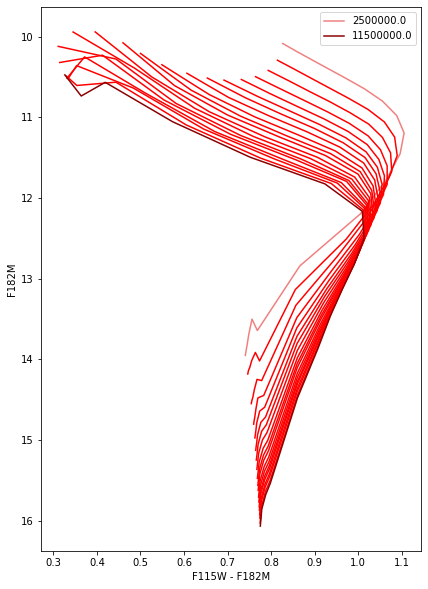

In [8]:
# identify array indeces, create array for labels and colors
idx_arr = range(0, len(log_age_arr))
if len(idx_arr) > 3:
    idx_arr = idx_arr[::2]

# Plot CMD
fig, axes = py.subplots(figsize=(15, 10))
py.subplot(1, 2, 1)
for i in range(len(idx_arr)):
    idx = idx_arr[i]
    if i == 0:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'lightcoral', label=level_age_arr[i])
    elif i == len(idx_arr) - 1:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'darkred', label=level_age_arr[i])
    else:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'red', label='')
    
py.xlabel('F115W - F182M')
py.ylabel('F182M')
py.gca().invert_yaxis()
py.legend()

In [9]:
import sys
sys.path.append('/scratch/wyz5rge/synthetic-hr/12-18')
import interpolatorExp as interpolator

level_ages_myr = level_ages / 1e6
# print(level_ages_myr)

# create array of stars
stars = np.empty(len(cluster_table), dtype=object)

# perform interpolation for each star
for i in range(len(stars)):
    # print(str(i) + " " + str(level_ages_myr[i]) + " " + str(masses[i]))
    stars[i] = interpolator.interpolate(level_ages_myr[i], masses[i], instances, log_age_arr, filters)
    
# convert luminosity values to solar luminosities
watts_to_lsun = 1.0 / (3.846e26) # conversion factor for watts to Lsun

for i in range(len(stars)):
    if stars[i] is None:
        continue
    stars[i][0] = stars[i][0] * watts_to_lsun
    
for i in range(len(stars)):
    print(stars[i])

Desired mass 0.06895842179945424 is outside the range of the isochrone.
Desired mass 0.06895842179945424 is outside the range of the isochrone.
Desired mass 2.326448478984193 is outside the range of the isochrone.
Desired mass 2.326448478984193 is outside the range of the isochrone.
Desired mass 0.04093112166717806 is outside the range of the isochrone.
Desired mass 0.04093112166717806 is outside the range of the isochrone.
Desired mass 0.030672437361009684 is outside the range of the isochrone.
Desired mass 0.030672437361009684 is outside the range of the isochrone.
Desired mass 0.038397156098594086 is outside the range of the isochrone.
Desired mass 0.038397156098594086 is outside the range of the isochrone.
Desired mass 0.06032785968948606 is outside the range of the isochrone.
Desired mass 0.06032785968948606 is outside the range of the isochrone.
Desired mass 0.032044269232719726 is outside the range of the isochrone.
Desired mass 0.032044269232719726 is outside the range of the i

Desired mass 0.014926974135740864 is outside the range of the isochrone.
Desired mass 0.014926974135740864 is outside the range of the isochrone.
Desired mass 0.01354725167076527 is outside the range of the isochrone.
Desired mass 0.01354725167076527 is outside the range of the isochrone.
Desired mass 0.03241650579201426 is outside the range of the isochrone.
Desired mass 0.03241650579201426 is outside the range of the isochrone.
Desired mass 0.03042527253324988 is outside the range of the isochrone.
Desired mass 0.03042527253324988 is outside the range of the isochrone.
Desired mass 1.4231113119951055 is outside the range of the isochrone.
Desired mass 1.4231113119951055 is outside the range of the isochrone.
Desired mass 0.02254931486942711 is outside the range of the isochrone.
Desired mass 0.02254931486942711 is outside the range of the isochrone.
Desired mass 0.06277462187785611 is outside the range of the isochrone.
Desired mass 0.06277462187785611 is outside the range of the iso

Desired mass 0.05665670962340326 is outside the range of the isochrone.
Desired mass 0.05665670962340326 is outside the range of the isochrone.
Desired mass 0.055339100106179505 is outside the range of the isochrone.
Desired mass 0.055339100106179505 is outside the range of the isochrone.
Desired mass 1.9717821975848295 is outside the range of the isochrone.
Desired mass 1.9717821975848295 is outside the range of the isochrone.
Desired mass 0.018792603676142768 is outside the range of the isochrone.
Desired mass 0.018792603676142768 is outside the range of the isochrone.
Desired mass 1.8213772695514978 is outside the range of the isochrone.
Desired mass 1.8213772695514978 is outside the range of the isochrone.
Desired mass 0.06992175007231101 is outside the range of the isochrone.
Desired mass 0.06992175007231101 is outside the range of the isochrone.
Desired mass 0.02309054401258171 is outside the range of the isochrone.
Desired mass 0.02309054401258171 is outside the range of the iso

Desired mass 0.065409868016781 is outside the range of the isochrone.
Desired mass 0.065409868016781 is outside the range of the isochrone.
Desired mass 0.012526274621127915 is outside the range of the isochrone.
Desired mass 0.012526274621127915 is outside the range of the isochrone.
Desired mass 0.040160682416747355 is outside the range of the isochrone.
Desired mass 0.040160682416747355 is outside the range of the isochrone.
Desired mass 0.032236922477003195 is outside the range of the isochrone.
Desired mass 0.032236922477003195 is outside the range of the isochrone.
Desired mass 0.015305462833107575 is outside the range of the isochrone.
Desired mass 0.015305462833107575 is outside the range of the isochrone.
Desired mass 3.0323436727428152 is outside the range of the isochrone.
Desired mass 3.0323436727428152 is outside the range of the isochrone.
Desired mass 0.015655013037761158 is outside the range of the isochrone.
Desired mass 0.015655013037761158 is outside the range of the

Desired mass 0.03054230161967411 is outside the range of the isochrone.
Desired mass 0.03054230161967411 is outside the range of the isochrone.
Desired mass 0.05067075667122518 is outside the range of the isochrone.
Desired mass 0.05067075667122518 is outside the range of the isochrone.
Desired mass 0.04333780037160761 is outside the range of the isochrone.
Desired mass 0.04333780037160761 is outside the range of the isochrone.
Desired mass 0.014011972266089167 is outside the range of the isochrone.
Desired mass 0.014011972266089167 is outside the range of the isochrone.
Desired mass 2.006695419893788 is outside the range of the isochrone.
Desired mass 2.006695419893788 is outside the range of the isochrone.
Desired mass 0.06909661728588322 is outside the range of the isochrone.
Desired mass 0.06909661728588322 is outside the range of the isochrone.
Desired mass 2.4817844083778087 is outside the range of the isochrone.
Desired mass 2.4817844083778087 is outside the range of the isochro

Desired mass 0.05748547350394769 is outside the range of the isochrone.
Desired mass 0.05748547350394769 is outside the range of the isochrone.
Desired mass 4.300375604183852 is outside the range of the isochrone.
Desired mass 4.300375604183852 is outside the range of the isochrone.
Desired mass 0.06080848121697207 is outside the range of the isochrone.
Desired mass 0.06080848121697207 is outside the range of the isochrone.
Desired mass 0.019200316614074994 is outside the range of the isochrone.
Desired mass 0.019200316614074994 is outside the range of the isochrone.
Desired mass 0.051808358285123715 is outside the range of the isochrone.
Desired mass 0.051808358285123715 is outside the range of the isochrone.
Desired mass 2.8238494699910195 is outside the range of the isochrone.
Desired mass 2.8238494699910195 is outside the range of the isochrone.
Desired mass 0.04804077867778287 is outside the range of the isochrone.
Desired mass 0.04804077867778287 is outside the range of the isoch

Desired mass 0.0518696371112322 is outside the range of the isochrone.
Desired mass 0.0518696371112322 is outside the range of the isochrone.
Desired mass 0.06857489056301597 is outside the range of the isochrone.
Desired mass 0.06857489056301597 is outside the range of the isochrone.
Desired mass 0.029157204581799823 is outside the range of the isochrone.
Desired mass 0.029157204581799823 is outside the range of the isochrone.
Desired mass 0.04139984504695262 is outside the range of the isochrone.
Desired mass 0.04139984504695262 is outside the range of the isochrone.
Desired mass 1.4514202833842988 is outside the range of the isochrone.
Desired mass 1.4514202833842988 is outside the range of the isochrone.
Desired mass 0.0651688052174537 is outside the range of the isochrone.
Desired mass 0.0651688052174537 is outside the range of the isochrone.
Desired mass 0.04375019506987308 is outside the range of the isochrone.
Desired mass 0.04375019506987308 is outside the range of the isochro

Desired mass 2.2110129106060845 is outside the range of the isochrone.
Desired mass 2.2110129106060845 is outside the range of the isochrone.
Desired mass 0.04128753040266079 is outside the range of the isochrone.
Desired mass 0.04128753040266079 is outside the range of the isochrone.
Desired mass 0.014889261185570978 is outside the range of the isochrone.
Desired mass 0.014889261185570978 is outside the range of the isochrone.
Desired mass 0.021347442643222688 is outside the range of the isochrone.
Desired mass 0.021347442643222688 is outside the range of the isochrone.
Desired mass 0.0207656963237685 is outside the range of the isochrone.
Desired mass 0.0207656963237685 is outside the range of the isochrone.
Desired mass 0.03507080972464411 is outside the range of the isochrone.
Desired mass 0.03507080972464411 is outside the range of the isochrone.
Desired mass 0.06792082505747264 is outside the range of the isochrone.
Desired mass 0.06792082505747264 is outside the range of the iso

Desired mass 0.06775193944152362 is outside the range of the isochrone.
Desired mass 0.06775193944152362 is outside the range of the isochrone.
Desired mass 0.025614478369425136 is outside the range of the isochrone.
Desired mass 0.025614478369425136 is outside the range of the isochrone.
Desired mass 0.06493840061782855 is outside the range of the isochrone.
Desired mass 0.06493840061782855 is outside the range of the isochrone.
Desired mass 0.02400552711861854 is outside the range of the isochrone.
Desired mass 0.02400552711861854 is outside the range of the isochrone.
Desired mass 0.04037258728246986 is outside the range of the isochrone.
Desired mass 0.04037258728246986 is outside the range of the isochrone.
Desired mass 0.030869950482565398 is outside the range of the isochrone.
Desired mass 0.030869950482565398 is outside the range of the isochrone.
Desired mass 0.05375670063858085 is outside the range of the isochrone.
Desired mass 0.05375670063858085 is outside the range of the

Desired mass 0.04056955986898053 is outside the range of the isochrone.
Desired mass 0.04056955986898053 is outside the range of the isochrone.
Desired mass 0.04732605998814805 is outside the range of the isochrone.
Desired mass 0.04732605998814805 is outside the range of the isochrone.
Desired mass 0.03958526972684541 is outside the range of the isochrone.
Desired mass 0.03958526972684541 is outside the range of the isochrone.
Desired mass 2.6357636421461397 is outside the range of the isochrone.
Desired mass 2.6357636421461397 is outside the range of the isochrone.
Desired mass 0.02820541186347355 is outside the range of the isochrone.
Desired mass 0.02820541186347355 is outside the range of the isochrone.
Desired mass 0.013172483434362779 is outside the range of the isochrone.
Desired mass 0.013172483434362779 is outside the range of the isochrone.
Desired mass 0.01484039451268095 is outside the range of the isochrone.
Desired mass 0.01484039451268095 is outside the range of the iso

Desired mass 5.096776474613867 is outside the range of the isochrone.
Desired mass 5.096776474613867 is outside the range of the isochrone.
Desired mass 0.05155716136244706 is outside the range of the isochrone.
Desired mass 0.05155716136244706 is outside the range of the isochrone.
Desired mass 0.03839968700492204 is outside the range of the isochrone.
Desired mass 0.03839968700492204 is outside the range of the isochrone.
Desired mass 0.019890289176203713 is outside the range of the isochrone.
Desired mass 0.019890289176203713 is outside the range of the isochrone.
Desired mass 0.021565161444422547 is outside the range of the isochrone.
Desired mass 0.021565161444422547 is outside the range of the isochrone.
Desired mass 0.03554147785007152 is outside the range of the isochrone.
Desired mass 0.03554147785007152 is outside the range of the isochrone.
Desired mass 32.1720828283294 is outside the range of the isochrone.
Desired mass 32.1720828283294 is outside the range of the isochrone

[0.05928656276668231, 3439.463, 4.314, 14.297, 13.364]
[0.0075100106394594655, 3044.326, 4.429, 16.374, 15.58]
[0.0060590349229718635, 2990.841, 4.42, 16.589, 15.81]
[0.02642455915083316, 3119.569, 4.11, 15.136, 14.319]
[0.034787437105533864, 3183.49, 4.112, 14.822, 13.981]
None
None
None
[0.06568872347803212, 3527.127, 4.393, 14.211, 13.262]
None
None
[0.01779846935985957, 3053.449, 4.106, 15.459, 14.667]
[0.011886023437121805, 2961.536, 4.066, 15.835, 15.068]
None
None
[0.11175878281695412, 3683.023, 4.344, 13.696, 12.698]
[0.058032034146031995, 3431.013, 4.311, 14.317, 13.386]
None
None
[0.008586560057539072, 3003.422, 4.295, 16.211, 15.432]
None
[0.01887189359868106, 3060.426, 4.104, 15.416, 14.621]
[0.019169059321766324, 3062.633, 4.104, 15.405, 14.609]
[0.007069219764707092, 3022.252, 4.413, 16.43, 15.644]
[0.06617733202454269, 3552.63, 4.425, 14.216, 13.264]
[0.016754211478453334, 3127.307, 4.306, 15.648, 14.829]
None
[0.13289252789102998, 3611.397, 4.162, 13.486, 12.477]
[0.020

[0.04889065594772321, 3278.869, 4.139, 14.452, 13.57]
None
[0.07301566700421473, 3175.38, 3.812, 13.96, 13.111]
[0.011755451500081046, 2971.983, 4.092, 15.85, 15.082]
[0.04946469818381519, 3278.906, 4.134, 14.44, 13.557]
None
[0.06543530919314909, 3351.882, 4.14, 14.142, 13.222]
[0.06933802444164532, 3369.635, 4.142, 14.078, 13.151]
None
[0.6811071094032367, 4138.104, 3.93, 11.877, 10.823]
[0.033493343866538614, 3180.981, 4.123, 14.867, 14.027]
[0.014244038644086469, 3005.831, 4.084, 15.653, 14.878]
None
[0.12409852144376392, 3593.022, 4.174, 13.554, 12.552]
[0.1557312354190687, 3695.979, 4.185, 13.34, 12.312]
[0.2944879183419194, 4013.286, 4.223, 12.752, 11.705]
[0.02693160317098008, 3082.454, 4.019, 15.074, 14.272]
None
[0.012507878045537652, 2975.038, 4.072, 15.783, 15.015]
[0.023783092302885292, 3101.061, 4.112, 15.237, 14.427]
[0.02149244003014664, 3113.028, 4.177, 15.36, 14.546]
[0.0814330430146154, 3415.453, 4.138, 13.942, 12.996]
[0.07103230332976232, 3369.976, 4.131, 14.052, 1

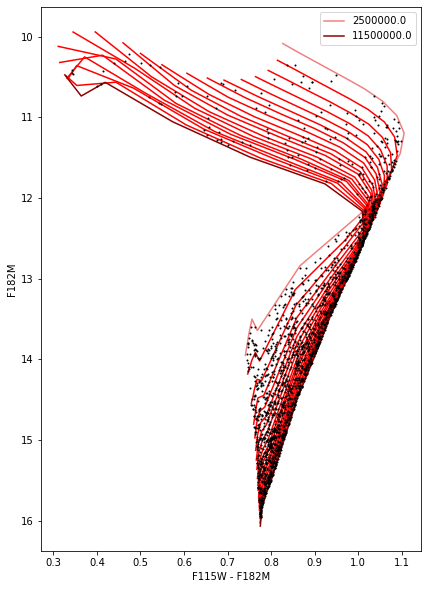

In [12]:
fig, axes = py.subplots(figsize=(15, 10))

# plot CMD
py.subplot(1, 2, 1)
for i in range(len(idx_arr)):
    idx = idx_arr[i]
    if i == 0:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'lightcoral', label=level_age_arr[i])
    elif i == len(idx_arr) - 1:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'darkred', label=level_age_arr[i])
    else:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'red', label='')
    
py.xlabel('F115W - F182M')
py.ylabel('F182M')
py.gca().invert_yaxis()
py.legend()

for i in range(len(stars)):
    if stars[i] is None:
        continue
    py.plot(stars[i][3] - stars[i][4], stars[i][4], marker='o', markersize=1, color='k')
